In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime

In [52]:
#data import
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era
# devided by WMO-defined gravity constant of 9.80665 m/s**2

<xarray.Dataset>
Dimensions:  (phony_dim_0: 1460, phony_dim_1: 20, phony_dim_2: 721,
              phony_dim_3: 1440)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3
Data variables:
    fields   (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3) float32 ...

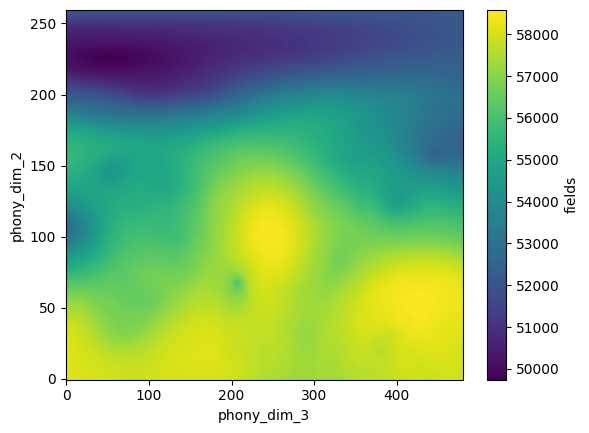

In [53]:
ds_era.isel(phony_dim_0 = 716, phony_dim_1 = 14, phony_dim_2= slice(260,0,-1),phony_dim_3= slice(720,1200)).fields.plot()

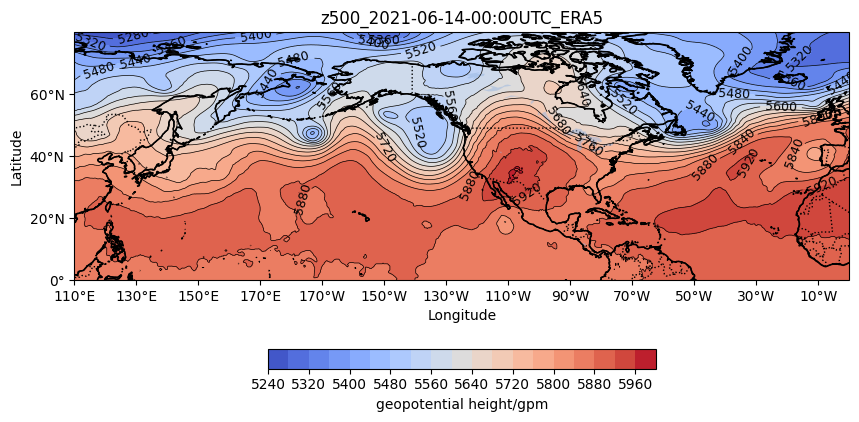

In [21]:

#ERA5 plots

#lat = ds_fcn_21['phony_dim_4']
#lon = ds_fcn_21['phony_dim_5']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(0, 80, 320)
lon = np.linspace(-70, 180, 1000)
lon_grid, lat_grid = np.meshgrid(lon, lat)


ds_era_z500 = ds_era.fields[656,14,360:40:-1,440:1440]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-70,180,0,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree(central_longitude=180))
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree(central_longitude=180))
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree(central_longitude=180))

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour = ax.contour(x,y,ds_era_z500/9.80665, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax.contourf(x,y,ds_era_z500/9.80665,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour3, ax=ax, label='geopotential height/gpm',orientation='horizontal',shrink=0.5)


# Set plot title and labels
plt.title('z500_2021-06-14-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('Z500_2021-06-14_ERA5.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

In [26]:
#function to create plots from 06.14-07-14 00:00
def make_plots_era_z(data,path,title):
    fig = plt.figure(figsize=(10,6))
    #proj = ccrs.PlateCarree(central_longitude=-120)
    #ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    #proj = ccrs.PlateCarree(central_longitude=-120) 


    # Set up the map projection
    #projection = 'merc'  # Choose the desired projection
    #fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })
    lat = np.linspace(0, 80, 320)
    lon = np.linspace(-70, 180, 1000)
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    # Convert coordinates to map projection
    x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method

    leftlon, rightlon, lowerlat, upperlat = (-70,180,0,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
    ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree(central_longitude=180))
                  


# Add map 
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='w')


    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree(central_longitude=180))
    ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree(central_longitude=180))

    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()

    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
    contour = ax.contour(x,y,data/9.80665, levels=20, colors='k', linewidths=0.5)
    plt.clabel(contour, inline=1, fontsize=9) 
    contour1 = ax.contourf(x,y,data/9.80665,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
    cbar = plt.colorbar(contour1, ax=ax, label='Geopotential Height/gpm',orientation='horizontal',shrink=0.5)


# Set plot title and labels
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig(path, bbox_inches='tight',dpi=100)
    
    plt.close()
#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

In [27]:
dates = ['2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20','2021-06-21','2021-06-22','2021-06-23','2021-06-24',
        '2021-06-25','2021-06-26','2021-06-27','2021-06-28','2021-06-29','2021-06-30','2021-07-01','2021-07-02','2021-07-03','2021-07-04']

for idx, date in enumerate(dates):
    ds_slice = ds_era.fields[656 + 4 * idx, 14, 360:40:-1, 440:1440]
    filename = f'/home/kit/imk-tro/gj5173/z500_era5/Z500_{date}_ERA5.png'
    title = f'Z500_{date}_ERA5'
    make_plots_era_z(ds_slice, filename, title)
    

In [ ]:

ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200] #25°N - 80°N, 180°W - 60°W t2m
ds_era_z500 = ds_era.fields[716,14,260:0:-1,720:1200] #25°N - 80°N, 180°W - 60°W t2m

In [54]:
ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210629_00_pl.nc')
ds_ecmwf.z

<xarray.DataArray 'z' (time: 57, level: 4, latitude: 221, longitude: 481)>
[24236628 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... -60.5 -60.25 -60.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 25.5 25.25 25.0
  * level      (level) int32 1000 850 500 50
  * time       (time) datetime64[ns] 2021-06-29 ... 2021-07-13
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [55]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_pl\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['z'][:,2,:,:]

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)

#combined_data = xr.concat(data, dim='time1')
#combined_data
#combined_data[0,:,119,234]
np.shape(data_ec)

#ds_ecmwf.t2m[0,79:159,194:274]
data_array_ec =xr.DataArray(data_ec)
#data_array_ec[:,0,0,0]
#mean_ecmwf = np.mean(data_array_ec[:,:,79:159,194:274], axis=(-2, -1))
#mean_ecmwf

In [56]:
start_index = 56
step_size = 1
num_iterations =15
ec_values=[]
for i in range(num_iterations):
    ec_value = data_array_ec[(i+1) * step_size, start_index - i * step_size*4,:,:]
    ec_values.append(ec_value)
data_array_ec_values =xr.DataArray(ec_values)

In [57]:
np.shape(data_array_ec_values)

(15, 221, 481)

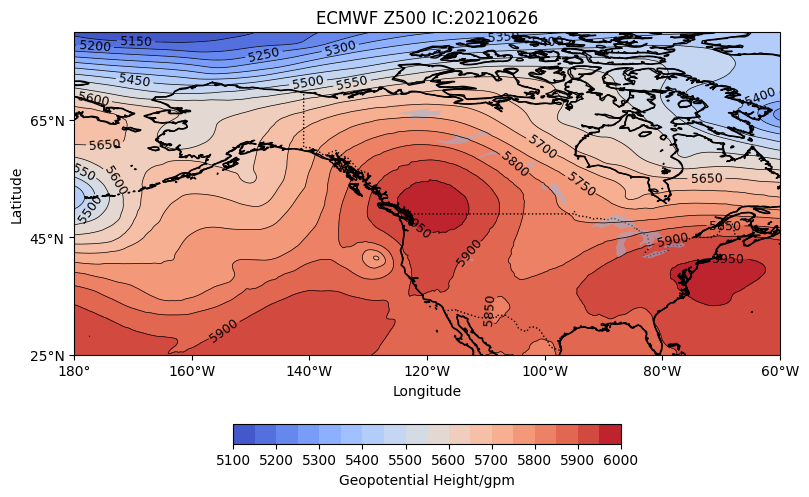

In [16]:
#ecmwf plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']
                  
# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour = ax3.contour(lon_ec,lat_ec,data_array_ec_values[11,:,:]/9.80665, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax3.contourf(lon_ec,lat_ec,data_array_ec_values[11,:,:]/9.80665,cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3, label='Geopotential Height/gpm',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('ECMWF Z500 IC:20210626')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/z500_era5/Z500_2021-06-26_ECMWF.png', bbox_inches='tight',dpi=100)
# Show the plot
#plt.show


In [3]:
ds_fcn_era5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era5

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

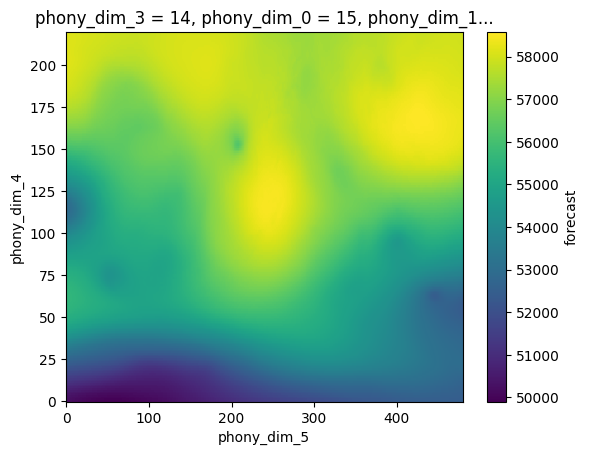

In [5]:
ds_fcn_era5.isel(phony_dim_0 = 15, phony_dim_1 = 0, phony_dim_4=slice(None,None,-1),phony_dim_2 = 0,  phony_dim_3 = 14).forecast.plot()

In [2]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
files_fcn_ec

data_fcn_ec = []
for file1 in files_fcn_ec:
    file_path_fcn_ec = os.path.join(directory_fcn_ec, file1)
    # Extract the date from the filename
    date_str = re.search(r'\d{8}', file1).group(0)
    
    date = datetime.datetime.strptime(date_str, '%Y%m%d').date()
    # Read the file and extract the desired variable
    ds_fcn_ec = xr.open_dataset(file_path_fcn_ec)
    variable_data_fcn_ec =  ds_fcn_ec['forecast'][50,:,14,:,:]
    data_fcn_ec.append(variable_data_fcn_ec)

data_array_fcn_ec =xr.DataArray(data_fcn_ec)    

#mean_fcn_ec = np.mean(data_array_fcn_ec, axis=(-2, -1))
#mean_fcn_ec
np.shape(data_array_fcn_ec)

(21, 57, 220, 480)

In [3]:
start_index = 56
step_size = 1
num_iterations =15
fcn_ec_values=[]
for i in range(num_iterations):
    fcn_ec_value = data_array_fcn_ec[(i+1) * step_size, start_index - i * step_size*4,:,:]
    fcn_ec_values.append(fcn_ec_value)
data_array_fcn_ec_values =xr.DataArray(fcn_ec_values)
#data_array_fcn_ec_values[14,:,:] = data_array_ec_values[14,:,:]
#replace the missing data

In [16]:
#data_array_fcn_ec_values

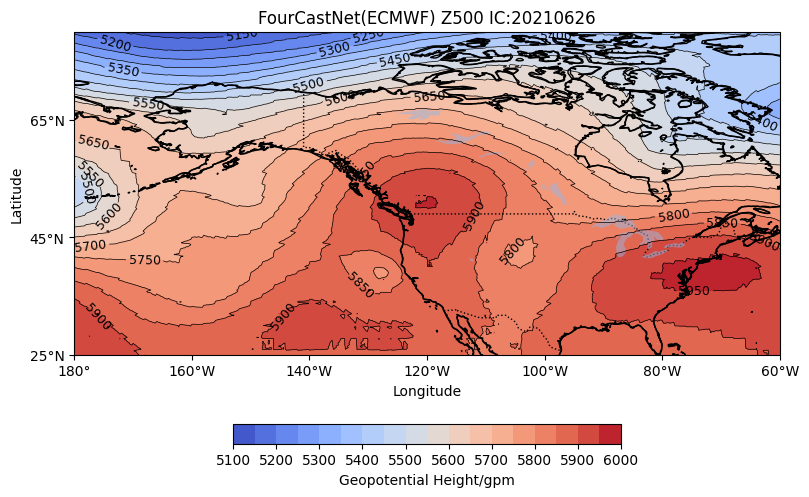

In [35]:
lat_fcn = np.linspace(25, 80, 220)
lon_fcn = np.linspace(-180, -60, 480)
lon_grid_fcn, lat_grid_fcn = np.meshgrid(lon_fcn, lat_fcn)
x, y = lon_grid_fcn, lat_grid_fcn
#fcn_ec plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())

# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour = ax3.contour(x,y,data_array_fcn_ec_values[11,::-1,:]/9.80665, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax3.contourf(x,y,data_array_fcn_ec_values[11,::-1,:]/9.80665,cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3, label='Geopotential Height/gpm',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('FourCastNet(ECMWF) Z500 IC:20210626')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/z500_era5/Z500_2021-06-26_FCN_EC.png', bbox_inches='tight',dpi=100)
# Show the plot
#plt.show

In [6]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

In [17]:
mean_fcn_era = ds_fcn_era.forecast[:,0,:,14,:,:]
mean_fcn_era
start_index = 56
step_size = 1
num_iterations =15
fcn_era_values=[]
for i in range(num_iterations):
    fcn_era_value = mean_fcn_era[(i+1) * step_size, start_index - i * step_size*4]
    fcn_era_values.append(fcn_era_value)
data_array_fcn_era_values=xr.DataArray(fcn_era_values)

#data_array_fcn_era_values

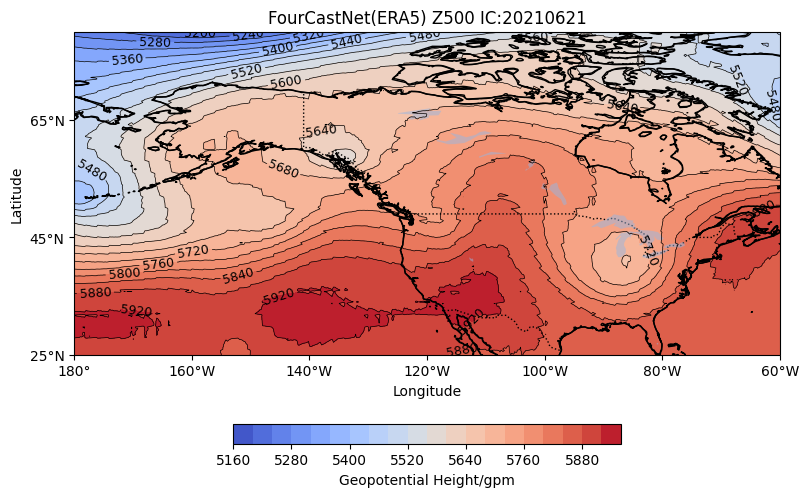

In [49]:
lat_fcn = np.linspace(25, 80, 220)
lon_fcn = np.linspace(-180, -60, 480)
lon_grid_fcn, lat_grid_fcn = np.meshgrid(lon_fcn, lat_fcn)
x, y = lon_grid_fcn, lat_grid_fcn
#fcn_ec plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())

# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour = ax3.contour(x,y,data_array_fcn_era_values[6,::-1,:]/9.80665, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax3.contourf(x,y,data_array_fcn_era_values[6,::-1,:]/9.80665,cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3, label='Geopotential Height/gpm',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('FourCastNet(ERA5) Z500 IC:20210621')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/z500_era5/Z500_2021-06-21_FCN_ERA5.png', bbox_inches='tight',dpi=100)
# Show the plot
#plt.show

In [78]:
#calculate the correlation coefficient
import numpy as np
from scipy.stats import pearsonr
ds_era_z500_0629 = ds_era.fields[716,14,260:40:-1,720:1200]
correlation_coefficient, p_value = pearsonr(ds_era_z500_0629.values.flatten(), data_array_ec_values[4,0:220,0:480].values.flatten())

In [79]:
correlation_coefficient

-0.650590101414227